In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/speeddating modified.csv')

In [3]:
df_perso = pd.read_csv('data/speeddating personal.csv')

In [4]:
df2 = df.copy()

In [5]:
caractéristiques_fixes = ['race', 'age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [6]:
variables_quantitatives = ['age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [7]:
variables_qualitatives = ['race']

## I) Le cas des femmes

### Dans cette partie, on s'intéresse aux caractéristiques des hommes que les femmes préfèrent

In [8]:
to_scale_m = df2[df2['gender'] == 'male'][variables_quantitatives]
scaler_m=StandardScaler()
scaler_m.fit(to_scale_m)

StandardScaler()

In [9]:
qltv_df_m = df2[df2['gender'] == 'male'][['race']]
pfl_df_m = pd.get_dummies(qltv_df_m)
pfl_df_m

,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other
100,0,0,1,0,0
101,0,0,1,0,0
102,0,0,1,0,0
103,0,0,1,0,0
104,0,0,1,0,0
...,...,...,...,...,...
8204,0,0,1,0,0
8205,0,0,1,0,0
8206,0,0,1,0,0
8207,0,0,1,0,0


In [10]:
scaled_features_m = scaler_m.transform(to_scale_m) # Reduce and center the quantitative variables
df_scaled_m = pd.DataFrame(scaled_features_m, columns=variables_quantitatives)
qltv_df_m = df2[df2['gender'] == 'male'][['race']]
pfl_df_m = pd.get_dummies(qltv_df_m)
final_df_m = pd.concat([pfl_df_m.reset_index(), df_scaled_m], axis = 1)
final_df_m.rename(columns = {'race_asian/pacific islander/asian-american' : 'asian',
                             'race_black/african american': 'black',
                             'race_european/caucasian-american': 'caucasian',
                             'race_latino/hispanic american': 'latino'}, inplace = True)
final_df_m

,index,asian,black,caucasian,latino,race_other,age,sports,tvsports,exercise,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,100,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
1,101,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
2,102,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
3,103,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
4,104,0,0,1,0,0,0.112550,0.402656,0.687754,-1.691640,...,0.204113,-0.635736,0.762685,-1.150493,-1.024080,0.180164,0.184303,0.138291,0.084395,-1.047003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,8204,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544
4132,8205,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544
4133,8206,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544
4134,8207,0,0,1,0,0,-0.471889,0.402656,-1.021711,-0.429471,...,-1.295371,1.333855,0.270646,-0.750153,0.423492,0.766905,1.536657,1.220542,0.867912,-0.274544


In [11]:
x_m = final_df_m
y_m = df2[df2['gender'] == 'male']['decision_o']

In [12]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_m, y_m, random_state = 0)

In [13]:
#instanciation du modèle
modele_regLog_m = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog_m.fit(x_train_m,y_train_m)
#précision du modèle
precision_m = modele_regLog_m.score(x_test_m,y_test_m)
print('précision de la régression logistique:', precision_m*100)

62.76595744680851


In [14]:
results_df_m = pd.DataFrame(np.concatenate([modele_regLog_m.intercept_.reshape(-1,1),
                             modele_regLog_m.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x_m.columns)).T
sorted_df_m = results_df_m.sort_values('coef').transpose()
sorted_df_m

,constante,asian,race_other,black,museums,concerts,age,tv,gaming,latino,...,reading,yoga,tvsports,shopping,clubbing,sports,music,art,dining,caucasian
coef,-0.772394,-0.549995,-0.21222,-0.149909,-0.14975,-0.138194,-0.1123,-0.081297,-0.058584,-0.058201,...,0.010818,0.024017,0.038745,0.058244,0.081005,0.129839,0.132035,0.14111,0.17814,0.197932


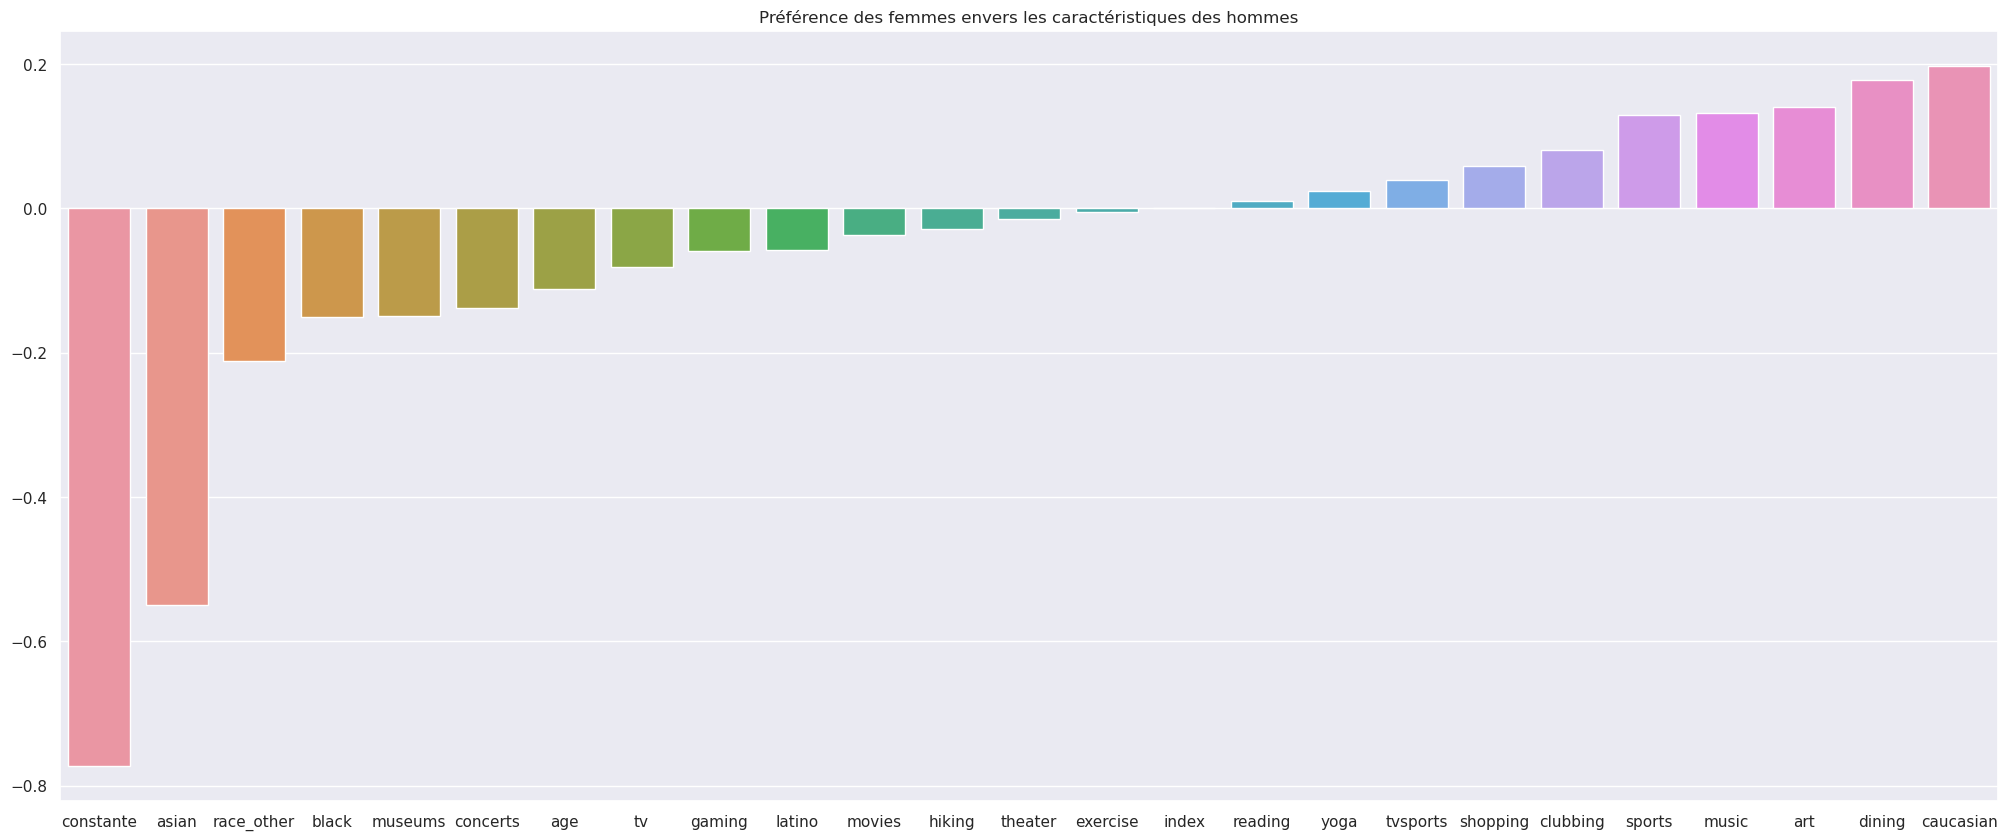

In [15]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.barplot(sorted_df_m).set(title="Préférence des femmes envers les caractéristiques des hommes")
plt.show()